<a href="https://colab.research.google.com/github/ewst22ParkSY/ESAA11_YB/blob/ESAA11_YB/ESAA_YB_WEEK6_2_transcript.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### LightGBM

- XGBoost보다 학습에 걸리는 시간이 훨씬 적음
- 메모리 사용량도 상대적으로 적음.
- XGBoost보다 학습에 걸리는 시간이 훨씬 적음
- 기능상의 다양성은 LightGBM이 우위
- 하지만 적은 데이터 세트(일반적으로 10,000건 이하)에 적용할 경우 과적합이 발생하기 쉬움.

일반 GBM계열의 트리 분할 방법과 다르게 **리프 중심 트리 분할(Leaf Wise)** 방식 사용.

(기존의 트리 기반 알고리즘은 깊이를 효과적으로 줄이기 위해 *균형 트리 분할* 방식 사용)

LightGBM은 트리의 균형을 맞추지 않고 최대 손실값(max delta loss)을 가지는 리프 노드를 지속적으로 분할하며 트리의 깊이가 깊어지고 비대칭적인 규칙 트리가 생성

LightGBM의 파이썬 패키지명
> lgihtgbm

XGBoost와 마찬가지로 초기에는 파이썬 래퍼용만 개발되었으나 이후 사이킷런 래퍼 LightGBM이 개발.



### LightGBM 설치

In [ ]:
pip install lightgbm==3.3.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 38.5 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.5.0
    Uninstalling lightgbm-4.5.0:
      Successfully uninstalled lightgbm-4.5.0


In [ ]:
import lightgbm
from lightgbm import LGBMClassifier

###LightGBM 하이퍼 파라미터

주요 파라미터
- num_iterations
- learning_rate
- max_depth
- min_data_in_leaf
- num_leaves
- boosting
- bagging_fraction
- feature_fraction
- lambda_L2
- lambda_L1

Learning Task 파라미터
- objective

### 하이퍼 파라미터 튜닝 방안
num_leaves의 개수를 중심으로 min_child_samples, max_depth를 함께 조정하면서 모델의 복잡도를 줄이는 것이 기본 튜닝 방안
  - num_leaves: 개수를 높이면 정확도 높아지지만 트리의 깊이가 깊어지고 모델이 복잡도가 커져 과적합 영향도가 커짐
  - min data_in_leaf 큰 값으로 설정시 깊어지는 것을 방지
  - max_depth: 명시적으로 깊이의 크기 제한


### 파이썬 래퍼 LightGBM과 사이킷런 래퍼 XGBoost, LightGBM 하이퍼 파라미터 비교




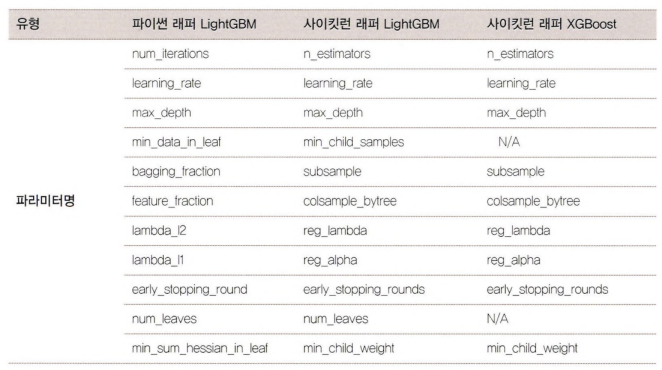

### LightGBM 적용 - 위스콘신 유방암 예측



In [ ]:
#pip install lightgbm==3.3.2
#!pip install xgboost==1.5.0
#!pip install pandas==1.3.5
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)

cancer_df['target']= dataset.target

X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156 )

# 위에서 만든 X_trainz y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train, test_size=0.1, random_state=156 )

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정.
lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능.
evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds = 50, eval_metric = 'logloss',
                 eval_set = evals, verbose = True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]


[1]	training's binary_logloss: 0.625671	valid_1's binary_logloss: 0.628248
[2]	training's binary_logloss: 0.588173	valid_1's binary_logloss: 0.601106
[3]	training's binary_logloss: 0.554518	valid_1's binary_logloss: 0.577587
[4]	training's binary_logloss: 0.523972	valid_1's binary_logloss: 0.556324
[5]	training's binary_logloss: 0.49615	valid_1's binary_logloss: 0.537407
[6]	training's binary_logloss: 0.470108	valid_1's binary_logloss: 0.519401
[7]	training's binary_logloss: 0.446647	valid_1's binary_logloss: 0.502637
[8]	training's binary_logloss: 0.425055	valid_1's binary_logloss: 0.488311
[9]	training's binary_logloss: 0.405125	valid_1's binary_logloss: 0.474664
[10]	training's binary_logloss: 0.386526	valid_1's binary_logloss: 0.461267
[11]	training's binary_logloss: 0.367027	valid_1's binary_logloss: 0.444274
[12]	training's binary_logloss: 0.350713	valid_1's binary_logloss: 0.432755
[13]	training's binary_logloss: 0.334601	valid_1's binary_logloss: 0.421371
[14]	training's binary

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix( y_test, pred)
  accuracy = accuracy_score(y_test , pred)
  precision = precision_score(y_test , pred)
  recall = recall_score(y_test , pred)
  f1 = f1_score(y_test,pred)
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차 행렬')
  print(confusion)
  print('정확도: {0: .4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


In [ ]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도:  0.9561, 정밀도: 0.9615, 재현율: 0.9740, F1: 0.9677, AUC:0.9877


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

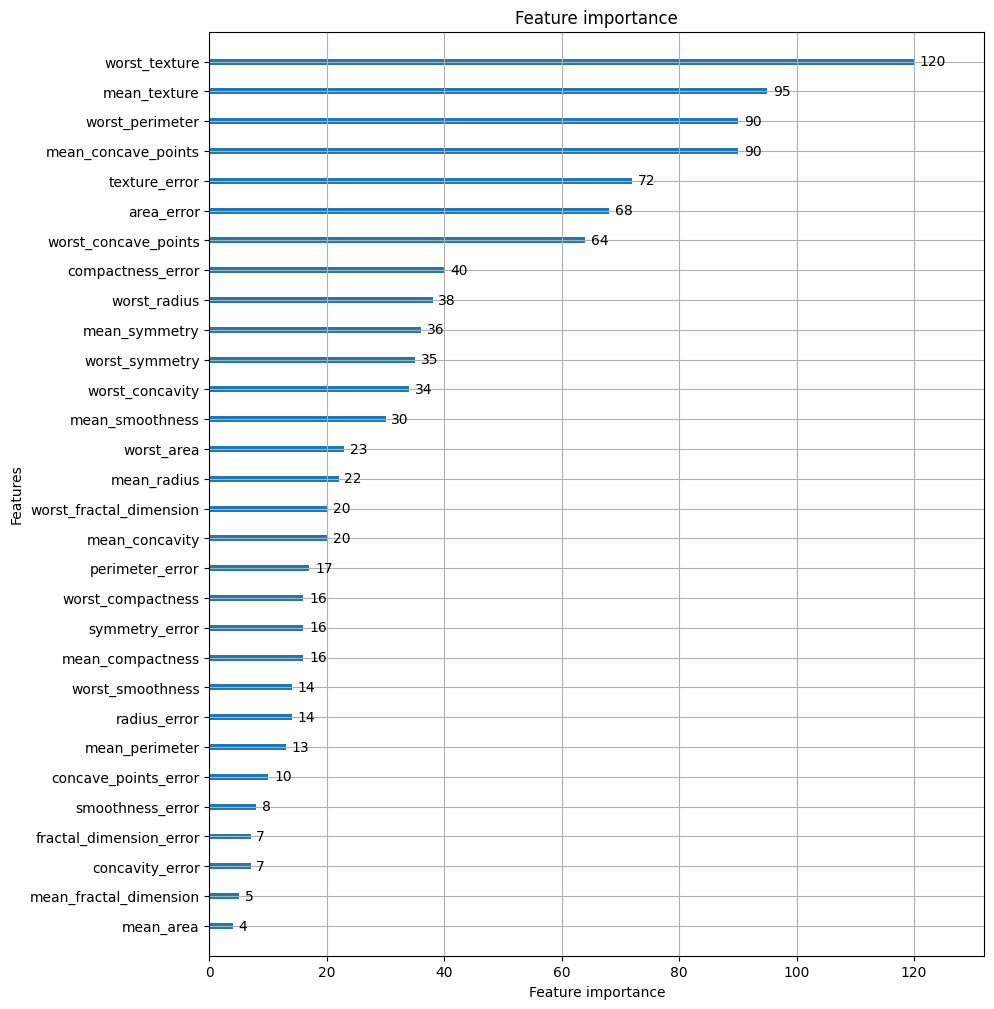

In [ ]:
# plot_importance( )를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as pit
%matplotlib inline

fig, ax = pit.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

### 베이지안 최적화 기반의 HyperOpt를 이용한 하이퍼 파라미터 튜닝

XGBoost나 LightGBM은 성능이 뛰어나지만 하이퍼 파라미터 개수가 다른 알고리즘에 비해 많음. > 최적의 하이퍼 파라미터를 찾기까지 시간이 오래 걸릴 수 있음.

실무의 대용량 학습 데이터에 XGBoost나 LightGBM의 하이퍼 파라미터 튜닝 시 GridSearch 방식대신 적용하는 것

###베이지안 최적화 개요
> 목적 함수 식을 제대로 알 수 없는 블랙 박스 형태의 함수에서 최대 또는 최소 함수 반환 값을 만드는 최적 입력값을 가능한 적은 시도를 통해 빠르고 효과적으로 찾아주는 방식

함수 식 자체를 알 수 없고, 단지 입력값과 반환값만 알 수 있는 상황에서 함수 반환값의 최대/최소 값을 찾기란 매우 어려움.

구성 중요 요소
- 대체 모델
- 획득 함수

베이지안 최적화 단계
1. 랜덤하게 하이퍼 파라미터 샘플링, 성능 결과 관측
2. 관측값을 기반으로 대체모델은 최적 함수 추정
3. 추정된 최적 함수를 기반으로 획득 함수가 다음으로 관측할 하이퍼 파라미터를 대체 모델에 전달
4. 획득 함수로부터 전달된 하이퍼 파라미터를 수행, 관측된 값을 기반으로 대체 모델이 갱신되어 다시 최적 함수를 예측 추정.

대체 모델로는 가우시안 프로세스를 적용.

### HyperOpt 사용하기


In [ ]:
pip install hyperopt

In [ ]:
from hyperopt import hp

# -10 ~ 10까지 1간격을 가지는 입력 변수 x와 -15~15까지 1간격으로 입력 변수 y 설정.
search_space = {'x': hp.quniform('x', -10, 10, 1), 'y': hp.quniform('y', -15, 15,1)}

In [ ]:
#목적 함수 생성

from hyperopt import STATUS_OK

# 목적 함수를 생성, 변숫값과 변수 검색 공간을 가지는 딕셔너리를 인자로 받고, 특정 값을 반환
def objective_func(search_space):
  x = search_space['x']
  y = search_space['y']
  retval = x**2 - 20*y

  return retval

입력값의 검색 공간과 목적 함수를 설정했으면 목적 함수의 반환값이 최소가 될 수 있는 최적의 입력값을 베이지안 최적화 기법에 기반하여 찾아 줘야함.

HyperOpt는 fmin(objective, space, algo, max_evals, trials) 함수를 제공함.

In [ ]:
from hyperopt import fmin, tpe, Trials
import numpy as np

# 입력 결괏값을 저장한 Trials 객체값 생성.
trial_val = Trials()

# 목적 함수의 최솟값을 반환하는 최적 입력 변숫값을 5번의 입력값 시도(max_evals=5)로 찾아냄.
best_01 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=5,
               trials=trial_val, rstate=np.random.default_rng(seed=0))
print('bset:', best_01)

100%|██████████| 5/5 [00:00<00:00, 246.96trial/s, best loss: -224.0]
bset: {'x': -4.0, 'y': 12.0}


In [ ]:
trial_val = Trials()

# max_evals를 20회로 늘려서 재테스트
best_02 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=20,
               trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best: ', best_02)


100%|██████████| 20/20 [00:00<00:00, 446.74trial/s, best loss: -296.0]
best:  {'x': 2.0, 'y': 15.0}


In [ ]:
# fmin( )에 인자로 들어가는 Trials 객체의 result 속성에 파이썬 리스트로 목적 함수 반환값들이 저장됨
# 리스트 내부의 개별 원소는 {'loss'：함수 반환값, ‘status'：반환 상태값}와 같은 딕셔너리임.
print(trial_val.results)


[{'loss': -64.0, 'status': 'ok'}, {'loss': -184.0, 'status': 'ok'}, {'loss': 56.0, 'status': 'ok'}, {'loss': -224.0, 'status': 'ok'}, {'loss': 61.0, 'status': 'ok'}, {'loss': -296.0, 'status': 'ok'}, {'loss': -40.0, 'status': 'ok'}, {'loss': 281.0, 'status': 'ok'}, {'loss': 64.0, 'status': 'ok'}, {'loss': 100.0, 'status': 'ok'}, {'loss': 60.0, 'status': 'ok'}, {'loss': -39.0, 'status': 'ok'}, {'loss': 1.0, 'status': 'ok'}, {'loss': -164.0, 'status': 'ok'}, {'loss': 21.0, 'status': 'ok'}, {'loss': -56.0, 'status': 'ok'}, {'loss': 284.0, 'status': 'ok'}, {'loss': 176.0, 'status': 'ok'}, {'loss': -171.0, 'status': 'ok'}, {'loss': 0.0, 'status': 'ok'}]


Trials 객체의 vals 속성은 딕셔너리 형태로 값을 가짐.

In [ ]:
# Trials 객체의 vals 속성에 {'입력변수명': 개별 수행 시마다 입력된 값 리스트} 형태로 저장됨.
print(trial_val.vals)

{'x': [-6.0, -4.0, 4.0, -4.0, 9.0, 2.0, 10.0, -9.0, -8.0, -0.0, -0.0, 1.0, 9.0, 6.0, 9.0, 2.0, -2.0, -4.0, 7.0, -0.0], 'y': [5.0, 10.0, -2.0, 12.0, 1.0, 15.0, 7.0, -10.0, 0.0, -5.0, -3.0, 2.0, 4.0, 10.0, 3.0, 3.0, -14.0, -8.0, 11.0, -0.0]}


In [ ]:
import pandas as pd
# results에서 loss 키값에 해당하는 밸류들을 추출하여 list로 생성.
losses = [loss_dict['loss'] for loss_dict in trial_val.results]

# DataFrame으로 생성 .
result_df = pd.DataFrame({'x': trial_val.vals['x'], 'y' : trial_val.vals['y'], 'losses' : losses})
result_df

,x,y,losses
0,-6.0,5.0,-64.0
1,-4.0,10.0,-184.0
2,4.0,-2.0,56.0
3,-4.0,12.0,-224.0
4,9.0,1.0,61.0
5,2.0,15.0,-296.0
6,10.0,7.0,-40.0
7,-9.0,-10.0,281.0
8,-8.0,0.0,64.0
9,-0.0,-5.0,100.0


### HyperOpt를 이용한 XGBoost 하이퍼 파라미터 최적화

In [ ]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156 )

# 앞에서 추출한 학습 데이터를 다시 학습과 검증 데이터로 분리
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train, test_size=0.1, random_state=156 )

In [ ]:
from hyperopt import hp

# max_depth는 5에서 20까지 1간격으로, min_child_weight는 1에서 2까지 1간격으로
# colsample_bytree는 0.5에서 1 사이, learning_rate는 0.01 에서 0.2 사이 정규 분포된 값으로 검색.
xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 20, 1),
                    'min_child_weight': hp.quniform('min_child_weight', 1, 2, 1),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
}

#목적 함수 설정

유의할 사항
1. 검색 공간에서 목적 함수로 입력되는 모든 인자들은 실수형 값이므로 이들을 XGBoostClassifier의 정수형으로 형변환을 해야함
2. HyperOpt의 목적 함수는 최솟값을 반환할 수 있도록 최적화해야 하기 때문에 정확도와 같이 값이 클수록 좋은 성능 지표일 경우 -1을 곱한 뒤 반환하여, 더 큰 성능 지표가 더 작은 반환값이 되도록 만들어줘야 함.

In [ ]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

# fmin()에서 입력된 search_space 값으로 입력된 모든 값은 실수형임.
# XGBClassifier의 정수형 하이퍼 파라미터는 정수형 변환을 해줘야 함.
# 정확도는 높을수록 더 좋은 수치. -1*정확도를 곱해서 큰 정확도 값일수록 최소가 되도록 변환
def objective_func(search_space):
  # 수행 시간 절약을 위해 nestimators는 100으로 축소
  xgb_clf = XGBClassifier( n_estimators = 100, max_depth = int(search_space['max_depth']),
                          min_child_weight = int(search_space['min_child_weight']),
                           learning_rate = search_space['learning_rate'],
                           colsample_bytree = search_space['colsample_bytree'],
                           eval_metric = 'logloss')
  accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring = 'accuracy', cv = 3)

  # accuracy는 cv=3 개수만큼 roc_auc 결과를 리스트로 가짐. 이를 평균해서 반환하되 -1을 곱함.
  return {'loss': -1*np.mean(accuracy), 'status': STATUS_OK}

In [ ]:
from hyperopt import fmin, tpe, Trials

trial_val = Trials()
best = fmin(fn = objective_func,
            space = xgb_search_space,
            algo = tpe.suggest,
            max_evals = 50,
            trials = trial_val, # 최대 반복 횟수를 지정합니다.
            rstate = np.random.default_rng(seed = 9))
print('best:', best)

100%|██████████| 50/50 [00:23<00:00,  2.12trial/s, best loss: -0.9670616939700244]
best: {'colsample_bytree': 0.5026505409854508, 'learning_rate': 0.19828428817109603, 'max_depth': 15.0, 'min_child_weight': 1.0}


In [ ]:
print('colsample_bytree: {0}, learning_rate: {1}, max_depth: {2}, min_child_weight: {3}'.format(
    round(best['colsample_bytree'], 5), round(best['learning_rate'], 5), int(best['max_depth']),
    int(best['min_child_weight'])))

colsample_bytree: 0.50265, learning_rate: 0.19828, max_depth: 15, min_child_weight: 1


In [ ]:
xgb_wrapper = XGBClassifier(n_estimators=400,
                            learning_rate = round(best['learning_rate'], 5),
                            max_depth = int(best['max_depth']),
                            min_child_weight = int(best['min_child_weight']),
                            colsample_bytree = round(best['colsample_bytree'], 5)
                            )

evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds = 50, eval_metric = 'logloss',
                eval_set = evals, verbose = True)

preds = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, preds, pred_proba)

TypeError: XGBClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'

### 스태킹 앙상블
> 스태킹(Stacking)은 개별적인 여러 알고리즘을 서로 결합해 예측 결과를 도출한다는 점에서 배깅, 부스팅과 공통점을 가짐.
> 하지만 차이점은 개별 알고리즘으로 예측한 데이터를 기반으로 다시 예측을 수행한다는 것.

스태킹 모델은 두 종류의 모델이 필요.
1. 개별적인 기반 모델
2. 이 개별 기반 모델의 예측 데이터를 학습 데이터로 만들어서 학습하는 최종 메타 모델

스태킹 모델 개념의 간단한 다이어그램

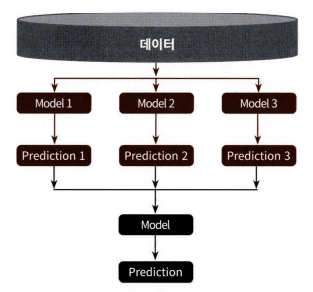

In [ ]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X_data, y_label, test_size = 0.2, random_state = 0)

In [ ]:
# 개별 ML 모델 생성
knn_clf = KNeighborsClassifier(n_neighbors = 4)
rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators = 100)

# 스태킹으로 만들어진 데이터 세트를 학습, 에측할 최종 모델
lr_final = LogisticRegression()

In [ ]:
# 개별 모델들을 학습.
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [ ]:
# 학습된 개별 모델들이 각자 반환하는 예측 데이터 세트를 생성하고 개별 모델의 정확도 측정.
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트래 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도: {0:.4f}'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9649
결정 트래 정확도: 0.9035
에이다부스트 정확도: 0.9561


In [ ]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

# transpose를 이용해 행과 열의 위치 교환. 칼럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦.
pred = np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


In [ ]:
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, final)))

최종 메타 모델의 예측 정확도: 0.9649


### CV 세트 기반의 스태킹
> 과적합을 개선하기 위해 최종 메타 모델을 위한 데이터 세트를 만들 때 교차 검증 기반으로 예측된 결과 데이터 세트를 이용

과적합 문제 개선을 위해 개별 모델들이 각각 교차 검증으로 메타 모델을 위한 학습용 스태킹 데이터 생성과 예측을 위한 테스트용 스태킹 데이터를 생성한 뒤 이를 기반으로 메타 모델이 학습과 예측을 수행

CV 세트 기반의 스태킹 모델 단계

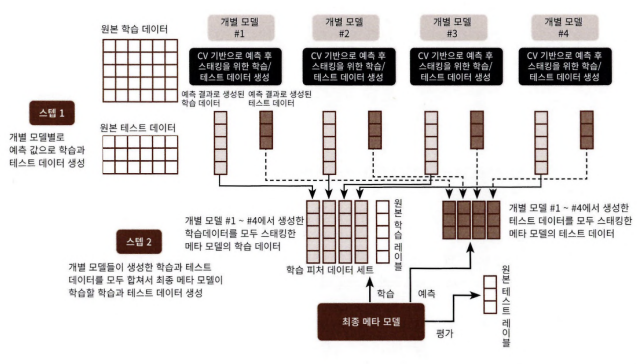

In [63]:
# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수.
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
  # 지정된 n_folds 값으로 KFold 생성.
  kf = KFold(n_splits = n_folds, shuffle = False)
  # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기와
  train_fold_pred = np.zeros((X_train_n.shape[0], 1))
  test_pred = np.zeros((X_test_n.shape[0], n_folds))
  print(model.__class__.__name__, 'model 시작')

  for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
    # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
    print('\t 폴드 세트: ', folder_counter, ' 시작')
    X_tr = X_train_n[train_index]
    y_tr = y_train_n[train_index]
    X_te = X_train_n[valid_index]

    #  폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
    model.fit(X_tr, y_tr)
    # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
    train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1, 1)
    # 입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장.
    test_pred[:, folder_counter] = model.predict(X_test_n)

  # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
  test_pred_mean = np.mean(test_pred, axis = 1).reshape(-1, 1)

  # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
  return train_fold_pred, test_pred_mean

In [64]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test, 7)
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)


KNeighborsClassifier model 시작
	 폴드 세트:  0  시작
	 폴드 세트:  1  시작
	 폴드 세트:  2  시작
	 폴드 세트:  3  시작
	 폴드 세트:  4  시작
	 폴드 세트:  5  시작
	 폴드 세트:  6  시작
RandomForestClassifier model 시작
	 폴드 세트:  0  시작
	 폴드 세트:  1  시작
	 폴드 세트:  2  시작
	 폴드 세트:  3  시작
	 폴드 세트:  4  시작
	 폴드 세트:  5  시작
	 폴드 세트:  6  시작
DecisionTreeClassifier model 시작
	 폴드 세트:  0  시작
	 폴드 세트:  1  시작
	 폴드 세트:  2  시작
	 폴드 세트:  3  시작
	 폴드 세트:  4  시작
	 폴드 세트:  5  시작
	 폴드 세트:  6  시작
AdaBoostClassifier model 시작
	 폴드 세트:  0  시작
	 폴드 세트:  1  시작
	 폴드 세트:  2  시작
	 폴드 세트:  3  시작
	 폴드 세트:  4  시작
	 폴드 세트:  5  시작
	 폴드 세트:  6  시작


In [65]:
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis = 1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis = 1)
print('원본 학습 피처 데이터 shape:', X_train.shape, '원본 테스트 피처 shape:', X_test.shape)
print('스태킹 학습 피처 데이터 shape:', Stack_final_X_train.shape,
      '스태킹 테스트 피처 데이터:', Stack_final_X_test.shape)

원본 학습 피처 데이터 shape: (455, 30) 원본 테스트 피처 shape: (114, 30)
스태킹 학습 피처 데이터 shape: (455, 4) 스태킹 테스트 피처 데이터: (114, 4)


In [66]:
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final)))

최종 메타 모델의 예측 정확도: 0.9825


스태킹 모델은 분류 뿐만 아니라 회귀에도 적용 가능.